In [ ]:
#prereq
"""
%pip install pyphen
%pip install spacy
%pip install numpy
%pip install pandas
%pip install matplotlib

!python -m spacy download ro_core_news_sm
"""

'\n!pip install pyphen\n!pip install spacy\n!pip install numpy\n!pip install pandas\n!pip install matplotlib\n\n!python -m spacy download ro_core_news_sm\n'

        Id                                           sentence       token  \
0        0  În plus a fost studiată suprafața în întregime...   întregime   
1        1  „Vezi o mulțime de reconstituiri ale acestor o...       arată   
2        2  La acest eveniment participă o profesoară de l...   participă   
3        3                     Ce este urmărirea oculară?\r\n   urmărirea   
4        4  „Un eveniment încântător: Scriitorul Besian Vo...     masivul   
...    ...                                                ...         ...   
1068  1068  O navă a lui Shannahan a rămas pe orbită înalt...   pregătiri   
1069  1069  Totuși, în sânul echipei științifice s-a ajuns...     echipei   
1070  1070  Lipsa de fonduri a întârziat cu trei ani trimi...       clipa   
1071  1071  Lipsa de fonduri a întârziat cu trei ani trimi...      partea   
1072  1072  Acesta constă într-o cameră cu infraroșu, folo...  deranjează   

         score  cons_vowel_ratio  
0     0.229167          1.000000  
1    

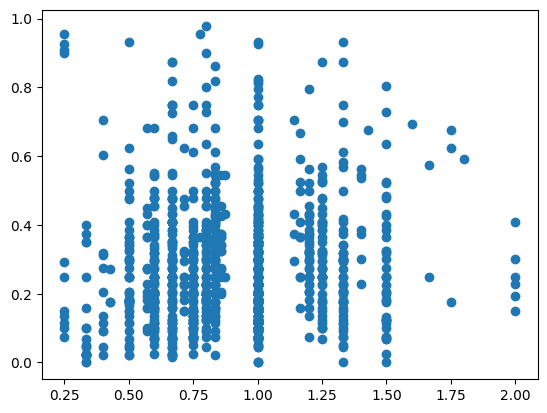

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('./date/train.csv')

vowels = "aeiouăîâ"
for v in vowels:
    vowel_count_vec = df['token'].str.lower().apply(lambda word: sum(word.count(vowel) for vowel in vowels))
    cons_count_vec = df['token'].str.len() - vowel_count_vec
    df['cons_vowel_ratio'] = cons_count_vec / (vowel_count_vec + np.ones(vowel_count_vec.shape)) # avoid case where word has no vowels

print(df)

plt.scatter(df['cons_vowel_ratio'], df['score'])
plt.show()
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

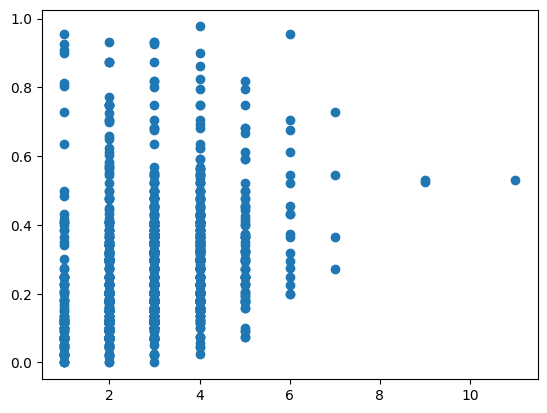

        Id                                           sentence       token  \
0        0  În plus a fost studiată suprafața în întregime...   întregime   
1        1  „Vezi o mulțime de reconstituiri ale acestor o...       arată   
2        2  La acest eveniment participă o profesoară de l...   participă   
3        3                     Ce este urmărirea oculară?\r\n   urmărirea   
4        4  „Un eveniment încântător: Scriitorul Besian Vo...     masivul   
...    ...                                                ...         ...   
1068  1068  O navă a lui Shannahan a rămas pe orbită înalt...   pregătiri   
1069  1069  Totuși, în sânul echipei științifice s-a ajuns...     echipei   
1070  1070  Lipsa de fonduri a întârziat cu trei ani trimi...       clipa   
1071  1071  Lipsa de fonduri a întârziat cu trei ani trimi...      partea   
1072  1072  Acesta constă într-o cameră cu infraroșu, folo...  deranjează   

         score  cons_vowel_ratio  syllable_count  
0     0.229167          

In [3]:
# extragerea numarului de silabe

import pyphen
syllaber = pyphen.Pyphen(lang='ro')

def count_syllables(word):
    hyphenated = syllaber.inserted(word)
    return len(hyphenated.split('-'))
    
df['syllable_count'] = df['token'].apply(count_syllables)

plt.scatter(df['syllable_count'],df['score'])
plt.show()

print(df)

In [11]:
# extragerea cuvantului la forma din dictionar si partea de vorbire

import spacy

nlp = spacy.load('ro_core_news_sm')

text = df['token'].apply(nlp)
df['lemma'] = [row[0].lemma_ for row in text]
df['word_type'] = [row[0].pos_ for row in text]
#df['word_type_idx'], _ = pd.factorize(df['word_type'])

df.to_csv('./date_prelucrate/train.csv', index=False)
print(df)

        Id                                           sentence       token  \
0        0  În plus a fost studiată suprafața în întregime...   întregime   
1        1  „Vezi o mulțime de reconstituiri ale acestor o...       arată   
2        2  La acest eveniment participă o profesoară de l...   participă   
3        3                     Ce este urmărirea oculară?\r\n   urmărirea   
4        4  „Un eveniment încântător: Scriitorul Besian Vo...     masivul   
...    ...                                                ...         ...   
1068  1068  O navă a lui Shannahan a rămas pe orbită înalt...   pregătiri   
1069  1069  Totuși, în sânul echipei științifice s-a ajuns...     echipei   
1070  1070  Lipsa de fonduri a întârziat cu trei ani trimi...       clipa   
1071  1071  Lipsa de fonduri a întârziat cu trei ani trimi...      partea   
1072  1072  Acesta constă într-o cameră cu infraroșu, folo...  deranjează   

         score  cons_vowel_ratio  syllable_count      lemma word_type  \
0 

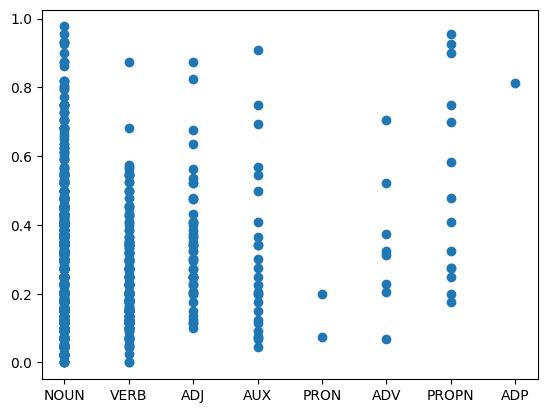

In [10]:
plt.scatter(df['word_type'], df['score'])